# **Exploratory Data Visualization**
Exploratory data visualization is the process of creating visual representations of data to gain insights, discover patterns, and identify relationships within a dataset. It involves the use of various graphical techniques and plots to explore the characteristics and structure of the data. The primary goal of exploratory data visualization is to understand the data and generate hypotheses or ideas for further analysis.

Common techniques used in exploratory data visualization include:

1. **Scatter plots:** Scatter plots display the relationship between two variables by plotting data points on a two-dimensional graph. They are useful for identifying correlations or patterns between variables.

2. **Histograms:** Histograms provide a visual representation of the distribution of a single variable. They group data into bins or intervals and display the frequency or count of observations within each bin.

3. **Box plots:** Box plots, also known as box-and-whisker plots, summarize the distribution of a variable by displaying quartiles, outliers, and the range of the data.

4. **Bar charts:** Bar charts are used to compare categories or groups by representing the values of different variables as rectangular bars. They are commonly used for categorical data.

**Spatial Data Visualization:**<br>
Spatial data visualization focuses on representing geographic or spatial data in visual form. It involves the use of maps, spatial plots, and other geospatial visualizations to explore and communicate patterns, relationships, and distributions across geographic areas.

Common techniques used in spatial data visualization include:

1. **Choropleth maps:** Choropleth maps use different colors or shading to represent the intensity or magnitude of a variable across regions or areas. They are effective for displaying data at an aggregated level, such as population density or election results by region.

2. **Scatter plots on maps:** Scatter plots can be overlaid on maps to visualize the relationship between variables at specific geographic locations. This allows for the exploration of spatial patterns or clusters.

3. **Heatmaps:** Heatmaps can be used in spatial data visualization to represent the density or intensity of events or occurrences across a geographic area. They provide a visual depiction of hotspots or areas of concentration.

4. **Cartograms:** Cartograms distort the size or shape of regions on a map based on a variable of interest, allowing for the visualization of relative magnitudes or proportions.

## **01. Import Required Libraries**

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## **0.2 Setting Up the Current Working Directory**

In [2]:
# Checking the current working directory
os.getcwd()

'd:\\Coding\\Git Repository\\Geospatial_Data_Science_with_Python\\03_Exploratory_Spatial_Data_Analysis'

In [3]:
# Changing the current working directory
file_path = r"D:\Coding\Git Repository\Geospatial_Data_Science_with_Python\Datasets"
os.chdir(file_path)
csv_path = file_path + "\\CSVs"
shp_path = file_path + "\\Shapafiles"

In [4]:
# Checking the new current working directory
os.getcwd()

'D:\\Coding\\Git Repository\\Geospatial_Data_Science_with_Python\\Datasets'

## **03. Reading the Data**

**Dataset Description:**<br>
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

**Content:**<br>
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [5]:
# Reading the housing.csv data with pandas
housing = pd.read_csv(csv_path + "\\housing.csv")
# Checking the name of the columns
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
# Checking the first 5 rows of the data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Checking the shape of the dataframe
housing.shape

(20640, 10)

## **04. Conducting Exploratory Data Analysis (EDA)**

In [8]:
# Checking the non-null values in each column
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Cleaning the data
housing.dropna(inplace=True)

In [10]:
# Checking the shape of the dataframe
housing.shape

(20433, 10)

In [11]:
# Checking the value counts of the ocean_proximity column
housing["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
# Definining a dictionary to encode the values of ocean_proximity column from string to int
ocean_proximity_dict = {"ISLAND": 0, "NEAR BAY": 1, "NEAR OCEAN": 2, "INLAND": 3, "<1H OCEAN": 4}
# Encoding the ocean_proximity column
encoded_ocean_proximity = housing["ocean_proximity"].replace(ocean_proximity_dict)

In [13]:
# Creating a copy of housing dataframe
housing_copy = housing.copy()

In [14]:
# Setting the encoded values of ocean_proximity column
housing_copy["ocean_proximity"] = encoded_ocean_proximity
# Checking the first 5 rows of the new housing_copy dataframe
housing_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


In [15]:
# Checking the non-null values in each column of the new housing_copy dataframe
housing_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


In [16]:
# Dropping the rows with null values
housing_copy.dropna(inplace=True)
# Resetting the index
housing_copy.reset_index(inplace=True, drop=True)

In [17]:
# Checking the final dataframe
housing_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


In [18]:
# Checking the dataframe information
housing_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [19]:
# Describing the dataframe
housing_copy.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,3.090589
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.004574
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,3.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,3.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

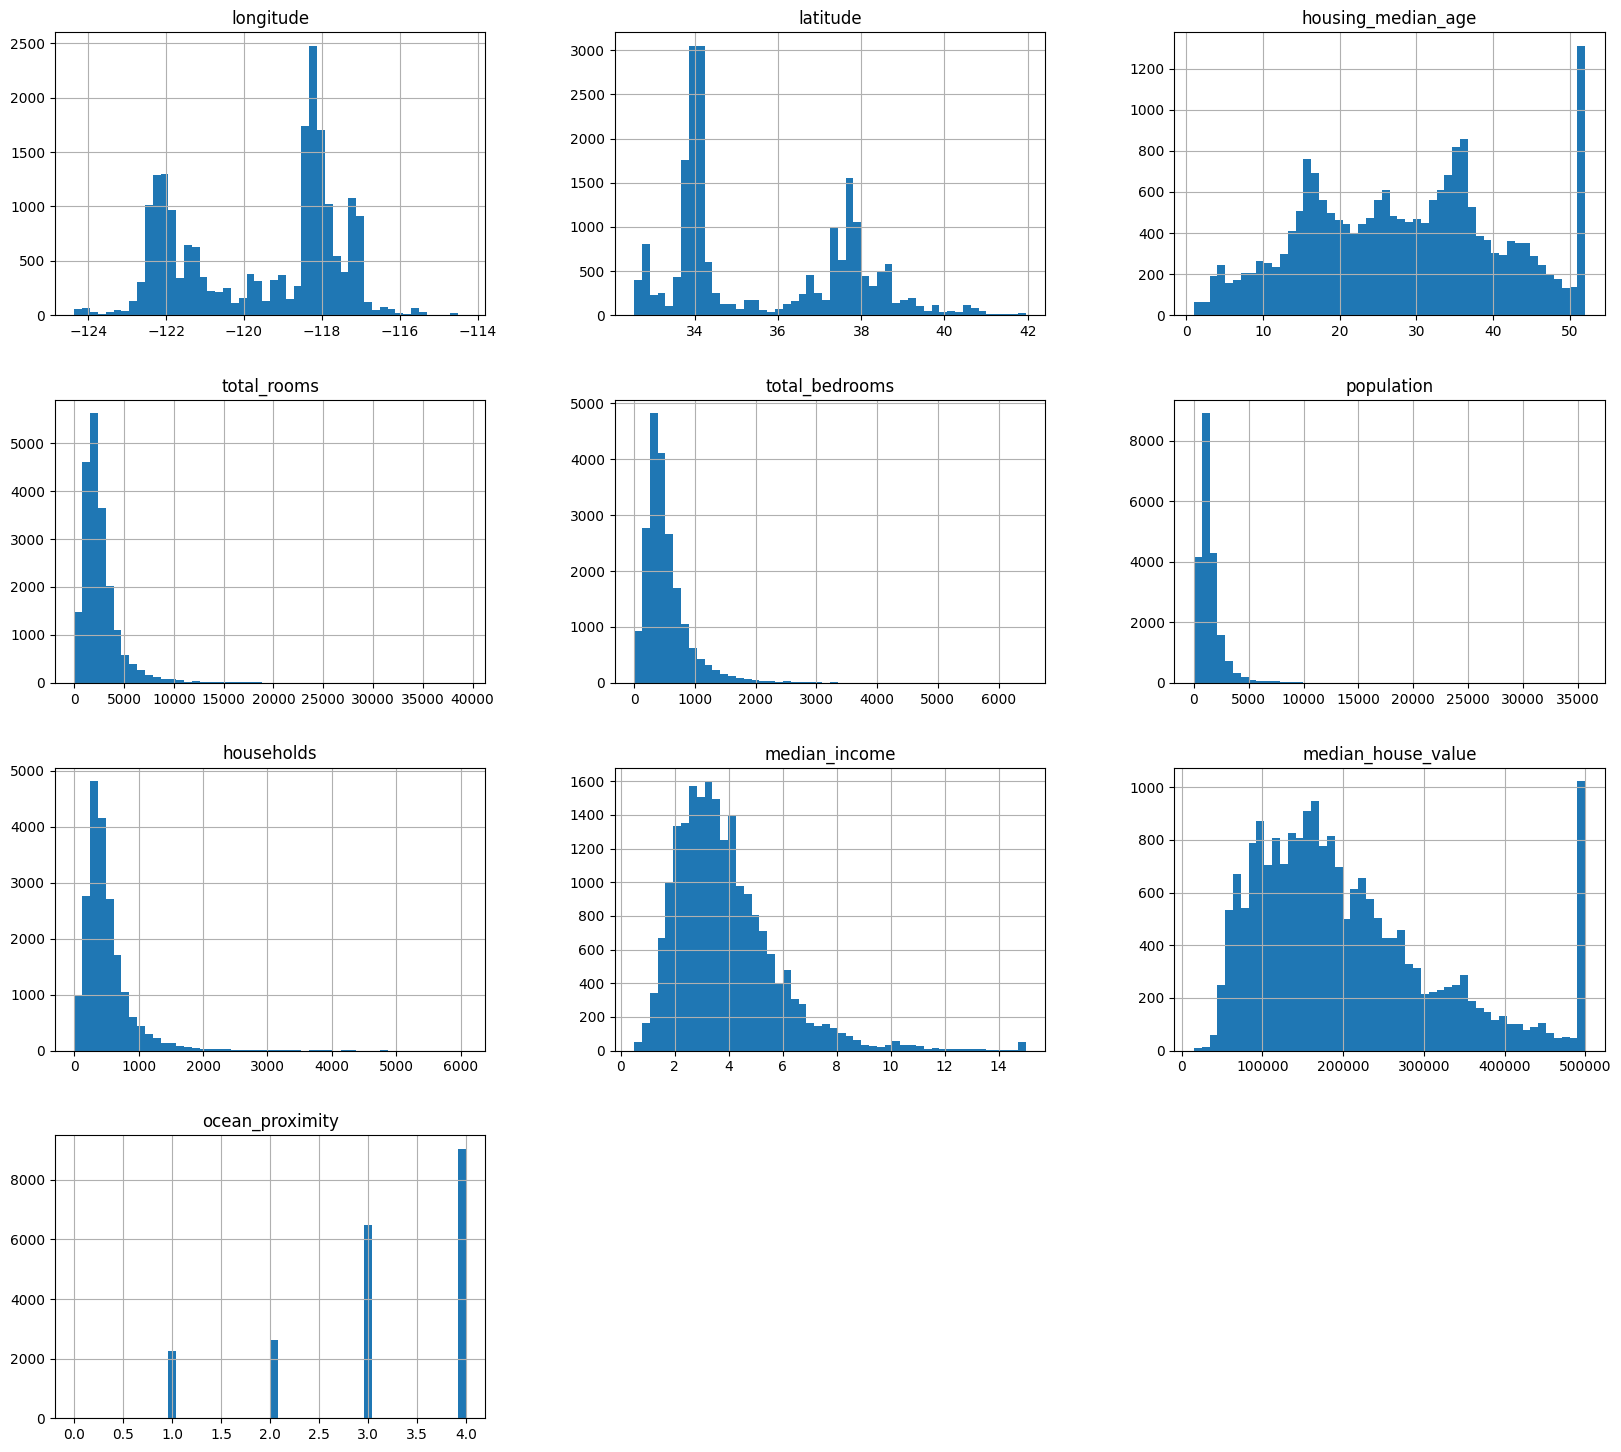

In [20]:
# Create a visual representation of the data
housing_copy.hist(bins=50, figsize=(20, 18))

## **05. Exploratory Spatial Data Analysis (ESDA)**

In [21]:
# Converting the pandas dataframe to a geopandas dataframe
housing_gdf = gpd.GeoDataFrame(housing_copy, geometry=gpd.points_from_xy(housing_copy.longitude, housing_copy.latitude, crs=4326))

In [22]:
# Checking the CRS of the geodataframe
housing_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Geoplot:**<br>
Geoplot is a Python library that provides a high-level interface for creating a wide range of geographical visualizations using matplotlib. It is built on top of geopandas, which is a powerful library for working with geospatial data. Geoplot simplifies the process of creating maps, enabling users to quickly generate various types of plots to visualize spatial data.

Geoplot offers a set of plot types that are commonly used in geographic data analysis, such as choropleth maps, kernel density estimation (KDE) plots, cartograms, and spatial lags. These plots can be easily customized to suit specific visualization requirements.

One of the key features of geoplot is its ability to work seamlessly with geopandas. Geopandas provides data structures to work with geospatial data, such as points, lines, and polygons, and allows users to perform spatial operations on them. Geoplot takes advantage of these data structures and operations, enabling users to create geospatial visualizations by leveraging the power of geopandas.

Geoplot provides an intuitive API that allows users to create plots with just a few lines of code. It integrates well with Jupyter notebooks, making it ideal for interactive data exploration and analysis. The library supports various map projections and provides tools for handling geographic coordinate reference systems (CRS).

In [23]:
# Importing geoplot library
import geoplot.crs as gcrs
import geoplot as gplt

<GeoAxes: >

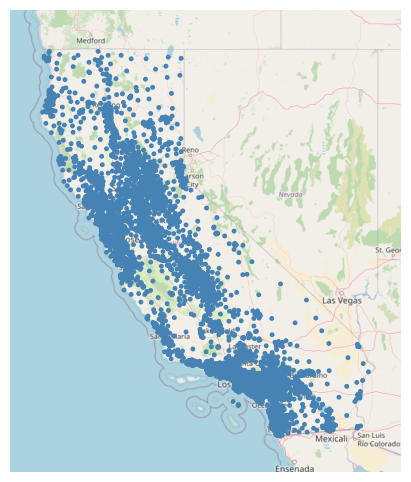

In [24]:
# Plotting the housing_gdf using geoplot
ax = gplt.webmap(housing_gdf, projection=gcrs.WebMercator())
gplt.pointplot(housing_gdf, ax=ax, marker=".")

In [25]:
# Loading the USA States shapefile
usa_states = gpd.read_file(shp_path + "\\tl_2021_us_state.zip")
# Checking the first five rows of the geodataframe
usa_states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373..."


In [26]:
# Filtering the California geometry
california = usa_states["geometry"][usa_states["NAME"]=="California"]
# Checking the CRS of the California geometry
california.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

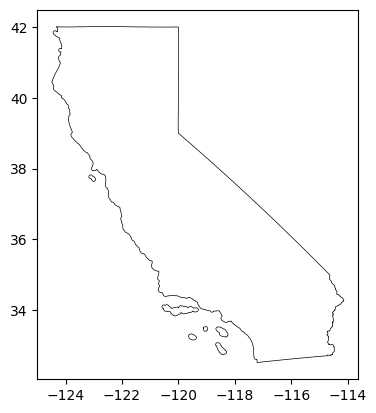

In [27]:
# Changing the CRS to Web Mercator (4326)
california = california.to_crs(4326)
# Plotting the California map
california.plot(color="white", edgecolor="black", linewidth=0.5)

In [28]:
# Checking the housing_gdf dataframe
housing_gdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,POINT (-122.23000 37.88000)
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,POINT (-122.22000 37.86000)
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,POINT (-122.24000 37.85000)
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,POINT (-122.25000 37.85000)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,POINT (-122.25000 37.85000)


**Heatmap:**<br>
A heatmap is a graphical representation of data where values are depicted as colors on a two-dimensional grid. It is particularly useful for visualizing the distribution and intensity of data points across different categories or dimensions.

In a heatmap, each cell of the grid represents a combination of two variables, typically displayed along the X and Y axes. The color of each cell corresponds to the value of a third variable, often referred to as the "intensity" or "magnitude" of the data. The colors used in the heatmap are usually chosen to represent a continuous spectrum, ranging from low to high values.

<GeoAxes: >

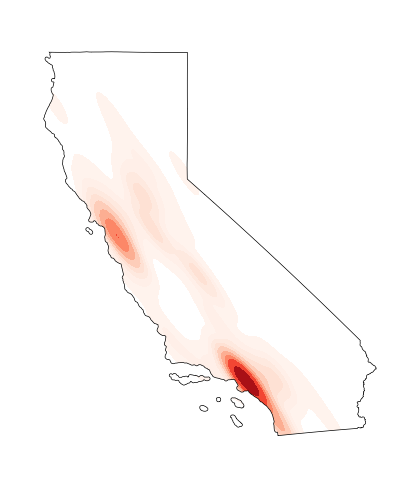

In [29]:
# Creating a heatmap of point locations
ax = gplt.kdeplot(housing_gdf,
                  fill=True, 
                  cmap="Reds", 
                  clip=california.geometry, 
                  projection=gcrs.WebMercator()
                  )
# Plotting the California polygon on top of the heatmap
gplt.polyplot(california, ax=ax, zorder=1)

Text(0.5, 1.0, 'Median House Value in California, USA in 1990')

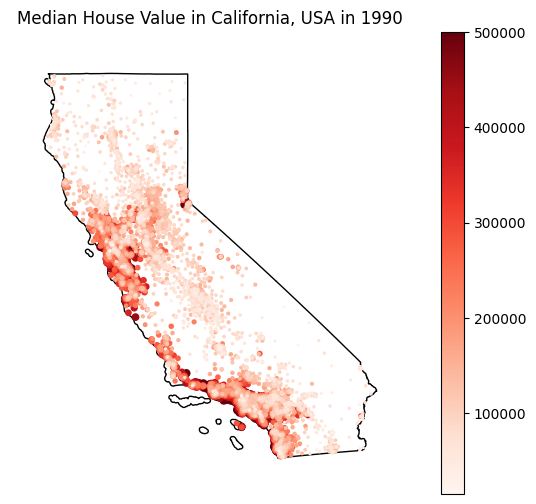

In [30]:
# Creating a point plot to display the spatial variation of median_house_value
ax = gplt.pointplot(housing_gdf,
                    hue="median_house_value",
                    scale="median_house_value",
                    cmap="Reds",
                    legend=True,
                    projection=gcrs.WebMercator()
                    )
# Plotting the Califonia polygon on top of the point plot
gplt.polyplot(california, ax=ax, zorder=0)
ax.set_title("Median House Value in California, USA in 1990")